In [1]:
%matplotlib inline

In [2]:
import torch

In [3]:
from torch.distributions import multinomial

In [4]:
from d2l import torch as d2l

In [5]:
fair_prob = torch.ones([6]) / 6

In [6]:
multinomial.Multinomial(1,fair_prob).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [7]:
multinomial.Multinomial(10,fair_prob).sample()

tensor([1., 0., 3., 3., 1., 2.])

In [8]:
multinomial.Multinomial(100,fair_prob).sample()

tensor([11., 17., 15., 16., 21., 20.])

In [9]:
multinomial.Multinomial(10000,fair_prob).sample()

tensor([1697., 1696., 1646., 1665., 1632., 1664.])

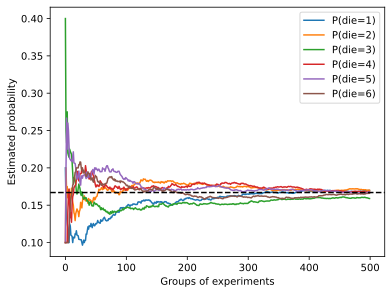

In [11]:
counts = multinomial.Multinomial(10, fair_prob).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();